# Numpy and Matplotlib essential

As suggested in one of the previous challenge, the library *numpy* is providing a very similar object than the list called *array*. The main difference is in the operation you can realise on it which are oriented towards computation. 

In this lesson we are going to learn a little more how to use this fundamental library to do any numerical analysis in Python.

Numpy extend the Python langage by providing new type (array, matrix, masked_array...), functions and method to realise efficient numerical calculation using Python.

The most basic numpy type is called *array*. The most basic array is a multi-dimensional object which contains numerical data.

[Numpy](http://www.numpy.org/) is **the** numerical library for Python. This library is too big to be taught in a day. That will be extremely boring and not useful at all. 

This library is at the base of all the other libraries used in science and data science: 

- [scipy](https://www.scipy.org/) Fundamental library for scientific computing (interation, optimisation...)
- [pandas](http://pandas.pydata.org/) data structure and data analysis tools
- [matplotlib](https://matplotlib.org/) Python 2D plotting

And more specialised one like:

- [astropy](http://www.astropy.org/) for the astronomy
- [h5py](https://www.h5py.org/) to interact with the HDF5 format
- [scikit-learn](http://scikit-learn.org/) for Machine Learning
- [TensorFlow](https://www.tensorflow.org) for Deep Learning

We are going to learn some of the basic command not seen in the first course using some of these libraries but keep in mind that we are just covering the basics so you can understand how to start using this library and hoping that will peak your interest enough.

To start, we are going to import the two libraries *numpy* and *matplotlib* that will be use in this episode.

In [38]:
import numpy as np
import matplotlib.pylab as plt

# Only on jupyter notebook
 %matplotlib inline   

In [39]:
odds_np = np.arange(1,10,2)

print('A numpy array:', odds_np)
print('type of the object:', type(odds_np))

A numpy array: [1 3 5 7 9]
type of the object: <class 'numpy.ndarray'>


**note**

```numpy.arange``` is very similar to range but return a numpy array instead of an iterator.

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> 
 What is the result of adding two lists together?
 </li>
 <li>
 What happens when you add two numpy arrays?
 </li>
 <br>
</div>

In [40]:
odds = [ i for i in range(10) if (i % 2) ]
print("list of odds:", odds)

list of odds: [1, 3, 5, 7, 9]


In [41]:
odds+odds

[1, 3, 5, 7, 9, 1, 3, 5, 7, 9]

In [42]:
odds_np + odds_np

array([ 2,  6, 10, 14, 18])

## Work with matrix like object

*Numpy* arrays are not exactly a matrix. They are multidimensional object to store data. They are not necessarily numerical. In contrast, a *matrix* object has to be numerical. In practice, a 2D numerical numpy array is very similar to a numpy matrix.

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> 
 From the previous *odds* variable, create a numpy array which contains only the first 9 elements.
 </li>
 <br>
</div>

In [43]:
odds_np = np.arange(1,20,2)

arr = odds_np[:9]
print(arr)
print(arr.shape)

[ 1  3  5  7  9 11 13 15 17]
(9,)


An array shape can be modified using the method *reshape*. Here we are creating a square array 3x3 from the previous array *arr*

In [44]:
arr = arr.reshape((3,3)) # notice the usage of a tuple (3,3).
print('The square array:\n', arr)

The square array:
 [[ 1  3  5]
 [ 7  9 11]
 [13 15 17]]


We use a new object called a tuple. A tuple is very similar to list but tuple cannot be modified. They are called *immutable*.

We can verify the type of the array created above and verify that it is, indeed, a numpy array.

In [45]:
type(arr)

numpy.ndarray

We can check the type of the element which composed that array:

In [46]:
print(arr.dtype)

int64


It is possible to modify the type of the element by using the method *astype*

In [47]:
arr = arr.astype(float)
print(arr.dtype)

float64


An array can be converted into a matrix object. A numpy matrix does have the characteristic of the mathematical matrix.

In [48]:
mat = np.matrix(arr)

In [49]:
type(mat)

numpy.matrixlib.defmatrix.matrix

A multiplication of matrix with the operator *\** will provide the expected mathematical answer.

In [50]:
mat

matrix([[ 1.,  3.,  5.],
        [ 7.,  9., 11.],
        [13., 15., 17.]])

In [51]:
mat * mat

matrix([[ 87., 105., 123.],
        [213., 267., 321.],
        [339., 429., 519.]])

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> 
 What happens when you multiply two arrays together? How is it different to multiplying matrices?
 </li>
 
 <br>
</div>

In [52]:
arr

array([[ 1.,  3.,  5.],
       [ 7.,  9., 11.],
       [13., 15., 17.]])

In [53]:
arr * arr

array([[  1.,   9.,  25.],
       [ 49.,  81., 121.],
       [169., 225., 289.]])

Matrix multiplication is also possible for arrays -- use the *matmul* function from numpy.

In [54]:
np.matmul(arr, arr)

array([[ 87., 105., 123.],
       [213., 267., 321.],
       [339., 429., 519.]])

In [55]:
np.matmul(mat, mat)

matrix([[ 87., 105., 123.],
        [213., 267., 321.],
        [339., 429., 519.]])

## Masked array

One very useful tool that numpy is providing to analyse experimental data is the masked array. When you are taking data from an experiment you always have some data which are not present, with bad signal to noise of that you cannot use for whatever reason. 

As example we are going to create a gauss function and adding some noise on it.

Reminder, the gauss function is define by:

\begin{equation*}
g(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation*}

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li> 
 Create a function called `gauss` which will take three arguments (inputs): *x*, *mu*, and *sigma*, as defined above. 
 </li>
 <li>
 Create a numpy array using the ```numpy``` function `linspace` which will contain 1000 points equally spaced between x=-100 and x=100.<br>
 Hint: You can print the help documentation of a function with ```help(name_of_the_function)```
 </li>
 <li>
 Create a list using the previous array containing the value of the gauss from x=-100 to x=100.
 </li>
 <li>
 Use the `matplotlib` library to plot the curve with mu=0 and sigma=10. 
 </li>
 <br>
</div>

### Challenge 1

In [56]:
def gauss(x, mu=0, sigma=1):
    return (1./(sigma * np.sqrt(2 * np.pi)) * 
            np.exp( - (x - mu)**2 / (2 * sigma**2)))

### Challenge 2

In [57]:
mu = 0
sigma = 10
x = np.linspace(-100, 100, 1000)

### Challenge 3

In [58]:
g = gauss(x, mu, sigma)

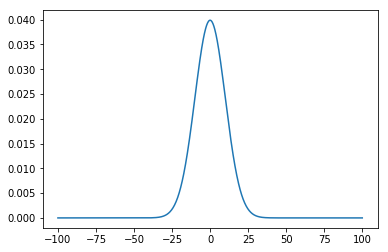

In [59]:
plt.plot(x, g)
plt.show()

### Noisy signal

Now we are going to add some random noise to that curve. 
To do it we can use the numpy function *normal* from the module *random* provided by numpy library:

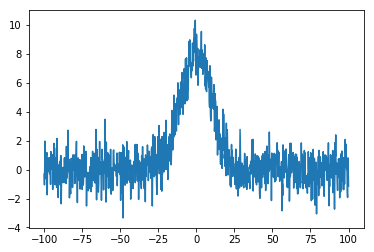

In [60]:
g = 100*g   # To have something visible we are multiplying the function by 100.

# Creation of the noise
noisy = np.random.normal(g)
plt.plot(x, g+noisy)
plt.show()

We can calculate the Signal to Noise ratio of the previous data set by dividing the noisy function by the standard deviation (the noise).

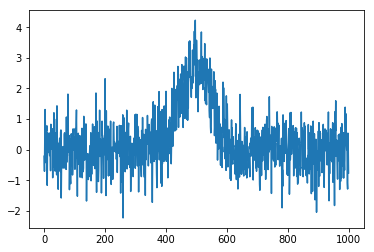

In [61]:
rms = np.std(noisy) # root mean square
SN = noisy / rms
plt.plot(SN)
plt.show()

[ True  True  True False  True]
(1000,)


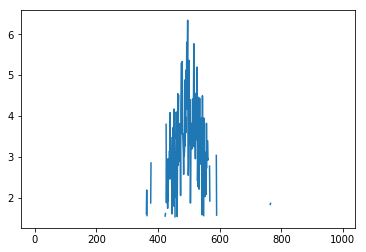

In [62]:
mask = SN < 1
print(mask[:5])
print(mask.shape)
noisy_ma = np.ma.array(noisy, mask=mask)
plt.plot(noisy_ma)
plt.show()

# Working with images

We are going to learn some commands to deal with images. Since most of the scientific domain are using their own file format, we obviously not learn all of them and I will use it an astronomical image using the format used mainly in this domain, the fits file. 

In the *data* directory you should find a file called *502nmos.fits*. 

We can verify that the file is indeed here:

In [63]:
ls *.fits

data/502nmos.fits


To be able to manipulate data in this file, we need to import a library which will be able to open the file and put the data in a numpy array. 

This is a good occasion to install a new library. To realise that, open a terminal. On Microsoft Windows, can you start the **Anaconda prompt** software: 

![MS Windows terminal](images/anaconda-prompt.png "Anaconda Prompt terminal")

On Unix system, you can start a terminal or having one started through the Jupyter notebook:

![Starting a Terminal with Jupyter](images/jupyter_terminal.png "Starting a terminal with Jupyter Notebook")

![Terminal using Jupyter](images/jupyter_terminal2.png "Terminal with Jupyter Notebook")

We are going to use the command **pip** which will allows you to install any package available on the python software repository: [Pypi](https://pypi.python.org/pypi). Here we will install the library [pyfits](http://www.astropy.org/) which will provide us the tools to open the fits images files. 

**Note:**

This is only an example to teach you how to install a library not yet available and how to open a specific image format. I am not expecting you to use this specific library in the furutre. Each domain, has their own file format (most of the time): 

- [NetCDF](https://www.unidata.ucar.edu/netcdf/)
- [HDF5](https://www.hdfgroup.org/HDF5/)
- MS Excel
- SQL
- ...

All of these formats can be open using python but you will have to install an additional library to do it.

In the previously open terminal:

```bash

pip install -U pyfits --user
```


The *pip* command will look at the *pypi* repository if the library *pyfits* is available, the *-U* option will look if there are an upgrade available (if *pyfits* is already present on your system) and the *--user* option will install the library in the user account not on the system wide (you do not have to be administrator to install a new python library).

<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li>
 What is the main format for your data?
 </li>
 <li>
 Find a python library which will allows you to open this format and convert it in a numpy array.
 </li>
 </div>

Some available libraries:

- FITS, VOTable...: [astropy](http://docs.astropy.org/en/stable/index.html#files-i-o-and-communication)
- CSV, HDF5, MS Excel, SQL...: [pandas](http://pandas.pydata.org/pandas-docs/stable/io.html)
- NetCDF: [netcdf4](http://unidata.github.io/netcdf4-python/)
- Matlab mat: [scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html)
- Tiff: [Pillow](https://pillow.readthedocs.io/en/latest/), [pylibtiff](https://github.com/pearu/pylibtiff),[matplotlib]()...

We are going to the data directory:

In [ ]:
import os
#Windows
#os.chdir('C:\Work\Python-advanced\data')
os.chdir('data')

### Working with binary file

We are importing the new library and we can now open the fits file.

In [65]:
#import astropy.io.fits as pyfits

try: 
    import pyfits
except ImportError:
    import astropy.io.fits as pyfits
    
im1 = pyfits.open('502nmos.fits')

**Note:**

By default pyfits is opening a file with the opion *memmap=True*. This option open the fits file without copying the data in memory and allowed to open very large file which will not fit in the physical memory.

Fits file are composed by  alist of HDU (Header and data unit). We can list the information with the method *info*.

Here we will be only interested on the primary HDU which is an image and is called *PRIMARY*

In [66]:
im1.info()

Filename: data/502nmos.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     290   (1600, 1600)   float32   
  1  502nmos_cvt.tab    1 TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


We can check what is the type of the image.

In [67]:
type(im1)

astropy.io.fits.hdu.hdulist.HDUList

**note**

HDUList are not object that you are familiar with.

We can access the first HDU (the one of interest) which contains the image as an element in a list using the index:

In [68]:
HDU_copy1 = im1[0]     # As mention an HDU is a list and we want to have access to the first one.

It is also possible to access it by using it's name (or key) as in a dictionary: 

In [69]:
HDU_copy2 = im1['PRIMARY']  # HDU can also be accessed through their name like dictionary

We can verified that both copy are the same.

In [70]:
HDU_copy1 == HDU_copy2

True

Fits data, as most of scientific data images containers, are composed with a header and a data part. The header contains metadata relevant to the observations and to the data itself. You can print them on screen by using the attribute *header*.

In [71]:
im1[0].header

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 1600 /                                                
NAXIS2  =                 1600 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                 2112 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2005-07-01'         / Date FITS file was created                     
FILENAME= '502nmos_cvt.hhh'    / Original filename                              
ALLG-MAX=           0.000000

To access the data itself (here an image of a nebulae), it is similar but the attribute is called *data*

In [72]:
imdata = im1[0].data
print(type(imdata))

<class 'numpy.ndarray'>


We can use matplotlib to show what the image look like

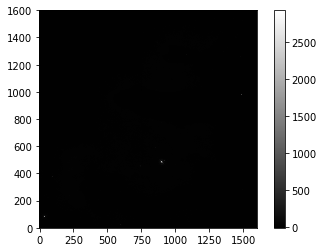

In [73]:
plt.imshow(imdata, origin='lower', cmap='gray')
plt.colorbar()

It is difficult to see anything on that image. This happen very often in astronomical images where very bright objects are saturating the CCD and a linear output will show a limited number of pixel because of contrast. 

We are going to improve the visible output by doing some simple analysis on the image which will help to side step the contrast problem.

In [74]:
print('mean value im1:', imdata.mean())
print('median value im1:', np.median(imdata))  # Note: median is not provided by a method!
print('max value im1:', imdata.max())
print('min value im1:', imdata.min())

mean value im1: 6.237272
median value im1: 6.7385635
max value im1: 2925.8718
min value im1: -12.439324


The previous result are giving us some useful informations. We can see that the range between the minimum and maximum value is really big and also that the maximum value is very far from the median or median value in a pixel. That probably means that a very small amount of pixels has very high value.

We can check it by plotting an histogram which will give us the number of pixel per number of photons.

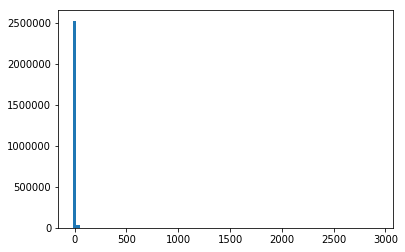

In [75]:
hist = plt.hist(imdata.ravel(), bins=100)
plt.show()

The histogram confirm our suspicion but we can improve the visualisation by plotting in logarithm.

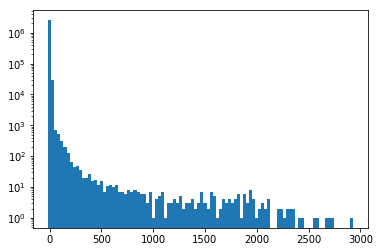

In [76]:
hist = plt.hist(imdata.ravel(), bins=100)
plt.yscale('log')

We can also modify manually the upper limit in number of pixel with photons (y axis) using the method ylim:

(0, 100000.0)

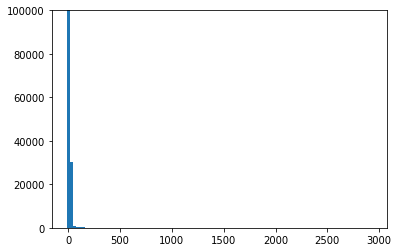

In [77]:
hist = plt.hist(imdata.ravel(), bins=100)
plt.ylim(0,1e5)

It is also possible to limit the range in the number of photons in a pixel (x axis) using the *range* argument in the *hist* function:

(0, 100000.0)

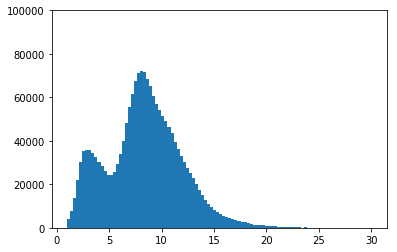

In [78]:
hist = plt.hist(imdata.ravel(), bins=100, range=(1,30))
plt.ylim(0,1e5)

Using the previous graphic we can limit the range in photons in plotting the previous image and improve the contrast using the *vmax* argument: 

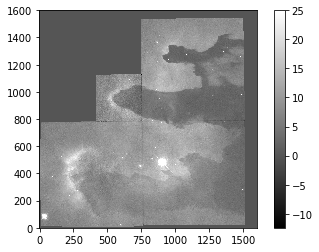

In [79]:
plt.imshow(imdata, origin='lower', cmap='gray', vmax=25)
plt.colorbar()

The next plots does not provide a lot of informations useful in our analysis but it is a classical plot that you can obtain with some visualisation tool. It sum the columns and the lines of the images and divide by the number of pixels in the direction. with this plot you can distinguish the 2 bright objects (stars) which are located for the first one in the lower left part of the imae and the second one, the brightest, which is more central.

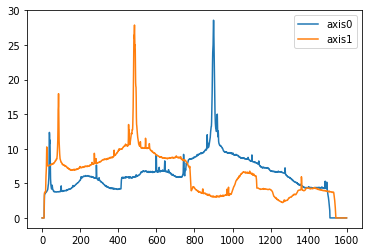

In [80]:
plt.plot(imdata.sum(axis=0)/imdata.shape[0], label='axis0')
plt.plot(imdata[:,::-1].sum(axis=1)/imdata.shape[1], label='axis1')
plt.legend()

Another option to improve the contrast visually is to plot the image after a conversion in logarithm (that will flatten the image). The problem is that the image can have negative value. The  *imdata - imdata.min() + 1* assure that every value in the image will be strictly greater than 0.

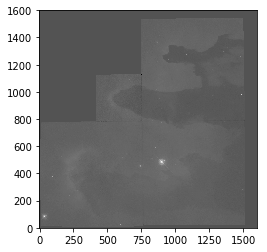

In [81]:
logim = np.log(imdata - imdata.min() + 1)
plt.imshow(logim, origin='lower', cmap='gray')

## Masked array

Numpy is providing an extremely useful tool called **masked array**. This tool associated to a numpy array another array composed only of boolean value (**True** or **False**) which indicate to numpy to use (or not) the specific element.

We are going to see how it can be used in our case study:

In [82]:
immasked = np.ma.masked_greater(imdata, 25)

#mask = imdata > 25
#masked1 = np.ma.array(imdata, mask=mask)

print(immasked)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]


Matplotlib is aware of this numpy object and will plot the image by looking **only** at the pixels with the value **True** in the associated mask:

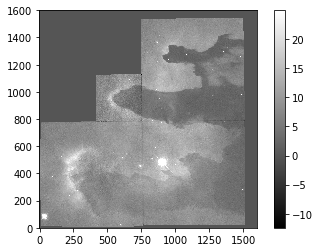

In [83]:
plt.imshow(immasked, cmap='gray', origin='lower')
plt.colorbar()

To access the mask created above, it is possible using the attribute **mask**


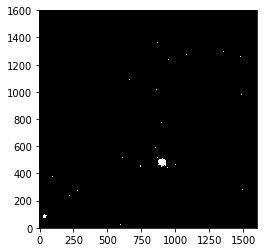

In [84]:
plt.imshow(immasked.mask, cmap='gray', origin='lower')

In [96]:
print('original average:', imdata.mean())
print('Masked average:', immasked.mean())
print()
print('original max:', imdata.max())
print('Masked max:', immasked.max())
print()
print('original min:', imdata.min())
print('Masked min:', immasked.min())
print()
print('original median:', np.mean(imdata))
print('Masked median:', np.ma.median(immasked))


original average: 6.237272
Masked average: 5.976717048232941

original max: 2925.8718
Masked max: 24.981937

original min: -12.439324
Masked min: -12.439324

original median: 6.237272
Masked median: 6.725283622741699


<div style='background:#B1E0A8; padding:10px 10px 10px 10px;'>
<H2> Challenges </H2>

 <ol>
 <li>
 Use mask array to calulate the log of the image.
 </li>
 </div>

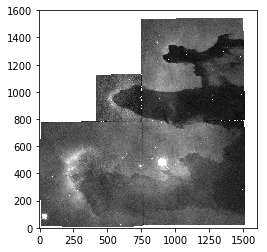

In [86]:
immasked2 = np.ma.masked_less_equal(imdata, 0)

immasked2.mask = immasked2.mask | immasked.mask

plt.imshow(immasked2, cmap='gray', origin='lower')

# Dtype

We already spoke about the ```dtype``` which stand for data type. 
This is not only an information but a very powerful tools especially to load data file.

In [87]:
cd data

/home/gruel/Documents/Cours/Python advanced class - Jupyter notebook/data


Using this tool we can load a complex file

In [88]:
%more informations.txt

In [89]:
with open('informations.txt') as f:
    data = f.readlines()

for line in data:
    print(line)

Firstame    Surname     Age     Phone     

Bob         Doe         18      077778778

Jane        Smith       24      077776666

Alice       Jones       35      066556657



In [90]:
data = np.loadtxt('informations.txt', 
                  skiprows=1, 
                  dtype={'names':('firstname', 'surname', 'age', 'phone'), 
                         'formats':('S8','S8','i','i')})


print(data)
print(type(data))

[(b'Bob', b'Doe', 18, 77778778) (b'Jane', b'Smith', 24, 77776666)
 (b'Alice', b'Jones', 35, 66556657)]
<class 'numpy.ndarray'>


What is the shape of this numpy array

In [91]:
data.shape

(3,)

We can access to each row using the indexes:

In [92]:
data[0]

(b'Bob', b'Doe', 18, 77778778)

And you can access to th different columns by using the keyword as in a dictionary:

In [93]:
data['age']

array([18, 24, 35], dtype=int32)

In [94]:
data['age'][0]

18

In [95]:
print(data['firstname'][0], data['phone'][0])

b'Bob' 77778778
